In [2]:
import os
import cv2, copy
import numpy as np
import platform 
import numpy as np
import pandas as pd;
import matplotlib.pyplot as plt
import argparse
import glob
import os, json
import os.path as osp
import sys, random
import imgviz
import numpy as np

# import seaborn as sns
import warnings

from skimage.feature import local_binary_pattern

warnings.filterwarnings('ignore')

In [26]:
pathImage = 'C:/Users/kaka/PycharmProjects/pythonProject/AOI/ICPR2023/Result/1.jpg'
pathImage2 = 'C:/Users/kaka/PycharmProjects/pythonProject/AOI/ICPR2023/Result/2.jpeg'

img1 = cv2.imread(pathImage)
img2 = cv2.imread(pathImage2)

img1_gray = cv2.imread(pathImage, cv2.IMREAD_GRAYSCALE)
img2_gray = cv2.imread(pathImage2, cv2.IMREAD_GRAYSCALE)

# Read image
img_ori1 = cv2.imread(pathImage).astype(np.float)
img_ori2 = cv2.imread(pathImage2).astype(np.float)

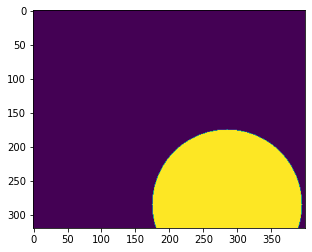

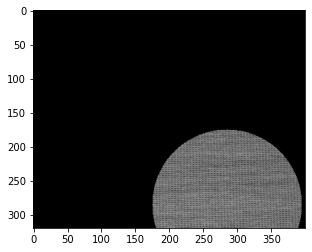

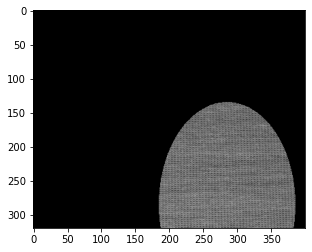

In [19]:
Mask1 = np.zeros((img1.shape[0], img1.shape[1]), dtype=np.uint8)  # 返回与图像 img1 尺寸相同的全零数组
Mask2 = Mask1.copy()
cv2.circle(Mask1, (285, 285), 110, (255, 255, 255), -1)  # -1 表示实心
cv2.ellipse(Mask2, (285, 285), (100, 150), 0, 0, 360, 255, -1)  # -1 表示实心

imgAddMask1 = cv2.add(img1, np.zeros(np.shape(img1), dtype=np.uint8), mask=Mask1)  # 提取圆形 ROI
imgAddMask2 = cv2.add(img1, np.zeros(np.shape(img1), dtype=np.uint8), mask=Mask2)  # 提取椭圆 ROI

plt.imshow( Mask1)  # 显示掩模图像 Mask
plt.show()

plt.imshow(imgAddMask1)  # 显示掩模加法结果 imgAddMask1
plt.show()

plt.imshow(imgAddMask2)  # 显示掩模加法结果 imgAddMask2
plt.show()


In [21]:
def gen_defect(image):
    h, w = image.shape
    label = np.zeros((h, w))
    image_label = copy.deepcopy(label)
    image_ad = copy.deepcopy(image)

    Mask = ['round', 'rectangle']
    Defect = [0, 1, 2] # ['rotation', 'alteration', 'shadow']

    cur_mask = random.choice(Mask)
    cur_defect = random.choice(Defect)

    #detect_img =  copy.deepcopy(img)
    for defect_idx in range(1):
        # detection's width height
        detect_w, detect_h = random.randrange(7, 15), random.randrange(310, 320)
        # position's x,y
        detect_x, detect_y = random.randrange(0, w - detect_w), random.randrange(0, h - detect_h)

        if cur_defect == 0:
            cur_angle = 45 #random.randrange(-45, 45)
            cur_scale = 1 #random.uniform(1.2, 2)
            rotateMatrix = cv2.getRotationMatrix2D((w / 2, h / 2), cur_angle, cur_scale)
            rotated = cv2.warpAffine(image, rotateMatrix, (w, h))
            center_x, center_y = int((w - detect_w) /2) , int((h -detect_w) /2)
            ad = rotated[center_y:center_y + detect_h, center_x:center_x + detect_w]
        elif cur_defect == 1:
            (mean, stddv) = cv2.meanStdDev(image)
            ad = np.ones([detect_h,detect_w]) * mean - 20
        elif cur_defect == 2:
            (mean, stddv) = cv2.meanStdDev(image)
            ad = np.ones([detect_h,detect_w]) * mean + 20

        ad_h, ad_w = ad.shape
        image_ad[detect_y: detect_y + ad_h,detect_x: detect_x + ad_w] = ad
        ad_label = np.ones((ad_h, ad_w)) * 255
        image_label[detect_y: detect_y + ad_h,detect_x: detect_x + ad_w] = ad_label

    image_ad = np.array(image_ad)
    # avoid overflow
    image_ad = np.where(image_ad > 255, 255, image_ad)
    image_ad = np.where(image_ad < 0, 0, image_ad)

    return image_ad, image_label

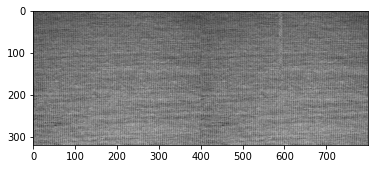

In [24]:
image_ad, image_label = gen_defect(img1_gray)

plt.imshow(np.concatenate((img1_gray, image_ad), axis = 1), 'gray')